# 2x2 fuel assembly with absorber and collimator

This example is a continuation of the first example. It extends the previous case with a pool (surrounded by air), a lead absorber and a collimator. Other materials and pins are the same, hence we go through that part quickly.

In this example we use only the case when the source locations are the center of the pins (ie. the randomNum attribute of the Experiment() object is not set.)

Let's import feign first.

In [1]:
from feign.geometry import *
from feign.blocks import *

## Materials

Then, define six Material() objects, water and uranium-dioxide, zirconium and helium.

In [2]:
uo2=Material('1')
uo2.set_density(10.5) #g/cm3

he=Material('2')
he.set_density(0.00561781)

zr=Material('3')
zr.set_density(6.52)

h2o=Material('4')
h2o.set_density(1.0)

air=Material('5')
air.set_density(0.001225)

lead=Material('6')  
lead.set_density(11.34)

uo2.set_path(('/data/UO2.dat',1))
he.set_path(('/data/He.dat',1))
zr.set_path(('/data/Zr.dat',1))
h2o.set_path(('/data/H2O.dat',1))
air.set_path(('/data/Air.dat',1))
lead.set_path(('/data/Pb.dat',1))

## Pins

In this example we assume that we are going to have only one pin type, the fuel pin. The uranium-dioxide region has 0.5 cm radius, that is followed by an 0.01 cm thick helium gap, and finally an 0.1 cm thick zirconium cladding. 

In [3]:
fuel=Pin('1')
fuel.add_region(uo2,0.5) #cm
fuel.add_region(he,0.51)
fuel.add_region(zr,0.61)

## Assembly

Now we can build a 2x2 assembly from the pin. We need to set the pitch of the lattice, the source, and the coolant. And we have to define a fuelmap based on the pinIDs. 
We will also define a pool with a Rectangle (and we will rotate it with 45 degrees, thus the corner of the assembly will face the wall). This will require us to set the surrounding material as well.

Note the middle of the assembly is always considered as being placed at (0,0).


In [4]:
assy=Assembly(2,2)
assy.set_pitch(1.3)
assy.set_source(uo2)
assy.set_coolant(h2o)
assy.set_pins(fuel)

pool=Rectangle(Point(-4,-4),Point(-4,4),Point(4,4),Point(4,-4)).rotate(45)

fuelmap=[['1','1'],
         ['1','1']]


assy.set_pool(pool)
assy.set_surrounding(air)
assy.set_fuelmap(fuelmap)

## Detector

At least one detector has to be defined in the problem. Let us place one at (5,5), facing the corner of the assembly.

We also define a collimator between the fuel and the detector. The collimator has a front and a back, both defined by Segment() objects. 

In [5]:
det=Detector('D')
det.set_location(Point(5, 5))

coll=Collimator('Dcoll')
coll.set_back(Segment(Point(2.0,1.0),Point(2.0,-1.0)).rotate(45))
coll.set_front(Segment(Point(3.5,0.2),Point(3.5,-0.2)).rotate(45))
det.set_collimator(coll)

## Absorber

We can define an absorber with a Rectangle or a Circle object. We have to set the material of the absorber and the material which is accommodating the absorber. 

In [6]:
lead2mm=Absorber('lead2mm')
lead2mm.set_form(Rectangle(Point(4.5, -2),Point(4.5, 2),Point(4.7, 2),Point(4.7, -2)).rotate(45))
lead2mm.set_material(lead)
lead2mm.set_accommat(air)

## Experiment

Finally we re ready to perform define our experiment.

In [7]:
ex2=Experiment()
ex2.set_assembly(assy)
ex2.set_detectors(det)
ex2.set_materials(uo2,he,zr,h2o,air,lead)
ex2.set_absorbers(lead2mm)

elines=['0.5','0.6','0.8','1.0','1.5','2.0']
ex2.set_elines(elines)

We can plot the geometry with the Plot() method. If the color attribute is set previously for the materials, then it is used for the plot, otherwise, the method will randomly assign colours for each material (the detector is set to white and the collimator is set to gray).

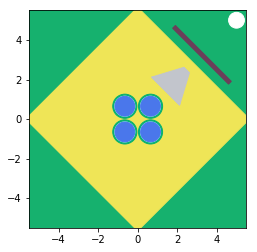

In [8]:
ex2.Plot(dpi=600,out=None,xl=[-5.5,5.5],yl=[-5.5,5.5],detectorSize=0.4)

When we run the experiment, we do not get any warnings, because everything is set.

In [9]:
ex2.Run()

#0 is being calculated
Distance travelled to detector D is being calculated
Contribution to detector D is calculated...
...for gamma energy 0.5 MeV
...for gamma energy 0.6 MeV
...for gamma energy 0.8 MeV
...for gamma energy 1.0 MeV
...for gamma energy 1.5 MeV
...for gamma energy 2.0 MeV


## Plotting the results

First let's just print the distance travelled by the ray to the detector. from each pin We would expect, that two pins are not seen by the detector due to the collimator.

Visualizing the data is not that interesting for this example.

In [10]:
ex2.dTmap['D']['1'] #to detector D, through matID '1'

array([[inf, 0.5],
       [1.5, inf]])

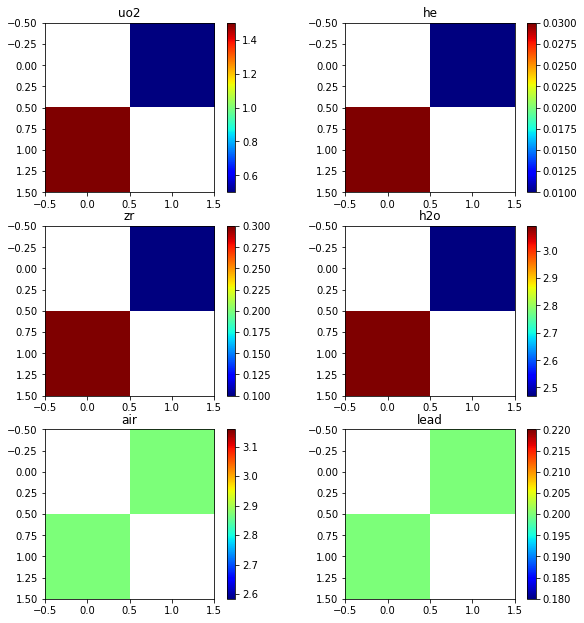

In [11]:
plt.figure()
plt.subplot(321)
plt.imshow(ex2.dTmap['D']['1'],cmap='jet')
plt.title('uo2')
plt.colorbar()

plt.subplot(322)
plt.imshow(ex2.dTmap['D']['2'],cmap='jet')
plt.title('he')
plt.colorbar()

plt.subplot(323)
plt.imshow(ex2.dTmap['D']['3'],cmap='jet')
plt.title('zr')
plt.colorbar()

plt.subplot(324)
plt.imshow(ex2.dTmap['D']['4'],cmap='jet')
plt.title('h2o')
plt.colorbar()

plt.subplot(325)
plt.imshow(ex2.dTmap['D']['5'],cmap='jet')
plt.title('air')
plt.colorbar()

plt.subplot(326)
plt.imshow(ex2.dTmap['D']['6'],cmap='jet')
plt.title('lead')
plt.colorbar()

plt.subplots_adjust(bottom=0.1, right=1.4, top=2.1)

plt.show()

## Geometric efficiency and pinwise contribution

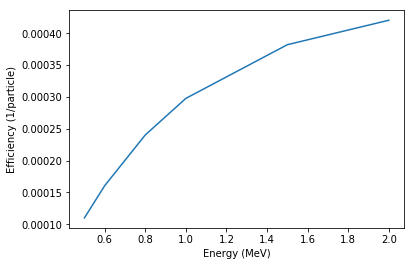

In [12]:
plt.figure()
plt.plot(ex2.elines,ex2._geomEff['D'])
plt.xlabel('Energy (MeV)')
plt.ylabel('Efficiency (1/particle)')
plt.show()

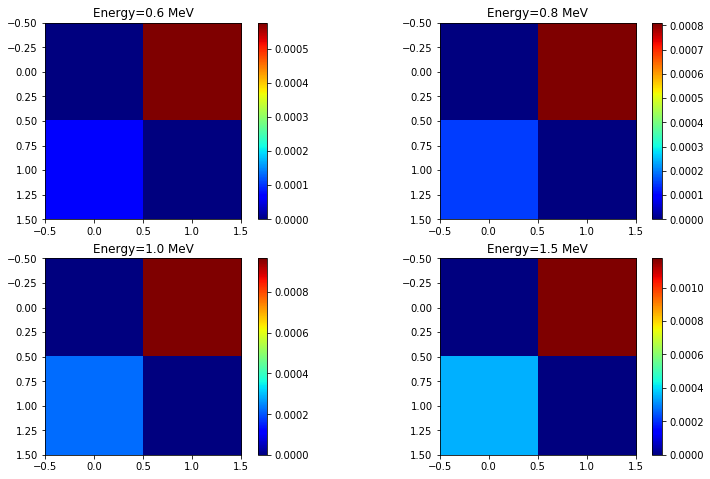

In [13]:
plt.figure()
plt.subplot(221)
plt.imshow(ex2._contributionMapAve['0.6'],cmap='jet')
plt.title('Energy=0.6 MeV')
plt.colorbar()

plt.subplot(222)
plt.imshow(ex2._contributionMapAve['0.8'],cmap='jet')
plt.title('Energy=0.8 MeV')
plt.colorbar()

plt.subplot(223)
plt.imshow(ex2._contributionMapAve['1.0'],cmap='jet')
plt.title('Energy=1.0 MeV')
plt.colorbar()

plt.subplot(224)
plt.imshow(ex2._contributionMapAve['1.5'],cmap='jet')
plt.title('Energy=1.5 MeV')
plt.colorbar()
plt.subplots_adjust(bottom=0.1, right=1.8, top=1.6)

plt.show()